In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## OLS regression for power plant output

The data in the file Data/power_plant_output.csv in the github repository contains measurements of the power output from electricity generation plants. The power (PE) is generated from a combination of gas turbines, steam turbines, and heat recovery steam generators, and so is affected by environmental factors in which the turbines operate, such as the ambient temperature (AT) and the steam turbine exhaust vacuum level (V). The dataset consists of 9568 observations of the PE, AT and V values. The data is a subset of the publicly available dataset held in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). The original data can be found at [Combined Cycle Power Plant Data Set](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant). 

In [2]:
# Read in the raw data
df = pd.read_csv("./Data/power_plant_output.csv")

We'll take a quick look at the data. First we'll look at a few rows of data

In [3]:
# Look at the first 10 rows
df.head(10)

,AT,V,PE
0,14.96,41.76,463.26
1,25.18,62.96,444.37
2,5.11,39.40,488.56
3,20.86,57.32,446.48
4,10.82,37.50,473.90
5,26.27,59.44,443.67
6,15.89,43.96,467.35
7,9.48,44.71,478.42
8,14.64,45.00,475.98
9,11.74,43.56,477.50


Next we'll look at summary statistics for the data. We'll use the pandas in-built describe function for this.

In [4]:
# Use pd.describe() to get the summary statistics of the data
df.describe()

,AT,V,PE
count,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,454.365009
std,7.452473,12.707893,17.066995
min,1.810000,25.360000,420.260000
25%,13.510000,41.740000,439.750000
50%,20.345000,52.080000,451.550000
75%,25.720000,66.540000,468.430000
max,37.110000,81.560000,495.760000


We'll check to see if any of the columns have missing values

In [5]:
df.isna().sum(axis = 0)

AT    0
V     0
PE    0
dtype: int64

Next we'll do a quick visual inspection of the relationships between the response variable, PE, and the various features. We'll do that simply through a series of scatter plots.

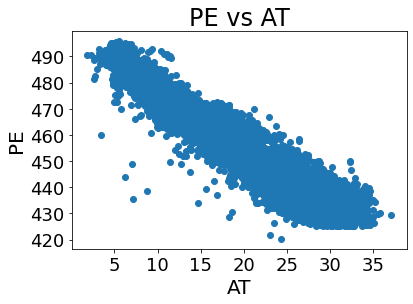

In [6]:
# Scatterplot between the response variable PE and the AT feature.
# The linear relationship is clear.
plt.scatter(df.AT, df.PE)
plt.title('PE vs AT', fontsize=24)
plt.xlabel('AT', fontsize=20)
plt.ylabel('PE', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

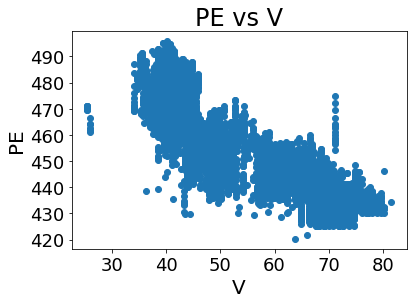

In [7]:
# Scatterplot between the response variable PE and the V feature.
# The linear relationship is clear, but not as strong as the relationship with the AT feature.
plt.scatter(df.V, df.PE)
plt.title('PE vs V', fontsize=24)
plt.xlabel('V', fontsize=20)
plt.ylabel('PE', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

We'll build a linear model of the PE response variable, using both features (AT, V). We'll use the statsmodels formula interface. This is because the statistical formula we specifiy is close in form to the mathematical form we would write down on paper, whilst for the standard interface to statsmodels it is less clear how the mathematical formula manifests itself in the code. The statistical formula is $PE\;\sim\; AT + V$. For now we don't worry about the meaning of the symbol $\sim$ - we will learn about that in the next  chapter. For now, we can think of this as the statistical formula equivalent of writing the mathematical formula $PE = \beta_{0} + \beta_{AT}x_{AT} + \beta_{V}x_{V}$. Note that in the statistical formula it looks like we have forgotten about the intercept. Fear not, the statistical model form will automatically assume we want an intercept included in our model and will add it for us, so we don't need to explicitly specify one in the statistical formula.

We'll use the statsmodels.formula.api.ols function to create and fit our OLS model.

In [8]:
# First we specify the model using statsmodels.formula.api.ols
model = smf.ols(formula='PE ~ AT + V', data=df)

In [9]:
# Now we fit the model to the data, i.e. we minimize the sum-of-squared residuals with respect to the model parameters
model_result = model.fit()

In [10]:
# Now we'll look at a summary of the fitted OLS model
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 5.197e+04
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:22:46   Log-Likelihood:                -28887.
No. Observations:                9568   AIC:                         5.778e+04
Df Residuals:                    9565   BIC:                         5.780e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    505.4774      0.240   2101.855      0.000     505.006     505.949
AT            -1.7043      0.013   -134.429      0.000      -1.729      -1.679
V             -0.3245      0.007    -43.644      0.000      -0.339      -0.310
==============================================================================
Omnibus:                      526.355   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1786.669
Skew:                          -0.198   Prob(JB):                         0.00
Kurtosis:                       5.080   Cond. No.                         282.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we'll do the OLS fitting explicitly using the matrix operations outlined in the chapter. We'll make use of the linear algebra functions of numpy and the linear algebra we learnt in Chapter 3. First we need to extract the design matrix and vector of response values from the pandas dataframe.

In [11]:
# We extract the design matrix as a 2D numpy array. This initially corresponds to the feature columns of the dataframe.
# In this case it is all but the last column
X = df.iloc[:, 0:(df.shape[1]-1)].to_numpy()

In [12]:
# Now we'll add a column of ones to the design matrix.
# This is the feature that corresponds to the intercept parameter in the moddel
X = np.c_[np.ones(X.shape[0]), X]

In [13]:
# For convenience, we'll create and store the transpose of the design matrix
xT = np.transpose(X)

In [14]:
# Now we'll extract the response vector to a numpy array
y = df.iloc[:, df.shape[1]-1].to_numpy()

Now we can calculate the OLS parameter values using the formula $\hat{\underline{\beta}} = \left ( \underline{\underline{X}}^{\top} \underline{\underline{X}}\right )^{-1} \underline{\underline{X}}^{\top} \underline{y}$

In [15]:
# Calculate the inverse of xTx using the numpy linear algebra functions
xTx_inv = np.linalg.inv(np.matmul(xT, X))

In [16]:
# Finally calculate the OLS model parameter estimates using the formula (xTx_inv)*(xT*y).
# Again, we use the numpy linear algebra functions to do this
ols_params = np.matmul(xTx_inv, np.matmul(xT, y))

Now let's compare the model parameter estimates from the statsmodels ols function and our explicit ols calculation.

In [17]:
# Now compare the parameter estimates from the explicit calculation with those obtained from the statsmodels fit
df_compare = pd.DataFrame({'statsmodels': model_result.params, 'explicit_ols':ols_params})
df_compare

,statsmodels,explicit_ols
Intercept,505.477434,505.477434
AT,-1.704266,-1.704266
V,-0.324487,-0.324487


## Simple gradient descent example

Here we will use the simulated data described in the main text and calculate the empirical risk function. We will then use the simple gradient descent update rule for 20 iterations, with a fixed learning rate of $\eta=0.05$.

To start we read in the raw data, which is held in the file Data/gradient_descent_example.csv of the github repository.

In [18]:
# Read in the raw data
df_risk = pd.read_csv("./Data/gradient_descent_example.csv")

# Extract the feature and response values to 
# numpy arrays
x=df_risk['x'].to_numpy()
y=df_risk['y'].to_numpy()

In [19]:
# Define functions for performing gradient descent

def risk(x, y, beta):
    '''
    Function to compute the empirical risk
    
    :param x: The feature values for our example
    :type x: A 1D numpy array
    
    :param y: The response values for our example
    :type y: A 1D numpy array
    
    :param beta: The model parameter value at which we want to 
                 evaluate the empirical risk
    :type beta: float
    
    :return: The empirical risk function value
    :rtype: float
    '''
    # Initialize the risk value
    risk = 0.0
  
    # Loop over the data an increment the risk with 
    # a squared-loss
    for i in range(x.shape[0]):
        risk += np.power(y[i]-(beta*x[i]), 2.0)
        
    risk /= x.shape[0]
  
    return risk


def derivative_risk(x, y, beta):
    '''
    Function to compute the derivative of the empirical risk
    with respect to the model parameter
    
    :param x: The feature values for our example
    :type x: A 1D numpy array
    
    :param y: The response values for our example
    :type y: A 1D numpy array
    
    :param beta: The model parameter value at which we want to 
                 evaluate the empirical risk
    :type beta: float
    
    :return: The derivative of the empirical risk function
    :rtype: float
    '''
    derivative_risk = 0.0
  
    for i in range(x.shape[0]):
        derivative_risk += - (2.0*x[i]*(y[i]-(beta*x[i])))

    derivative_risk /= x.shape[0]
    
    return derivative_risk   

In [20]:
# Set the learning rate and the number of iterations we want to perform
eta=0.05
n_iter=20

# Initialize arrays to hold the sequence of 
# parameter estimates and empirical risk values
beta_learn=np.full(1+n_iter, np.nan)
risk_learn=np.full(1+n_iter, np.nan)

# Set the starting estimate for the
# model parameter
beta_learn[0]=1.0

# Iterate using the gradient descent update rule
for iter in range(n_iter):
    risk_learn[iter] = risk(x,y,beta_learn[iter])
    beta_learn[iter+1] = beta_learn[iter] -(eta*derivative_risk(x,y,beta_learn[iter]))

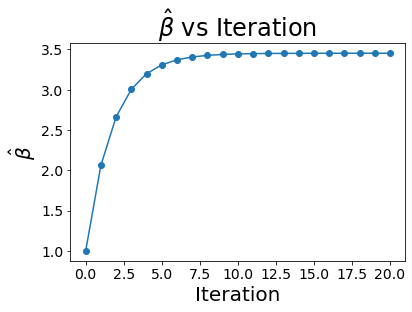

In [21]:
# Plot parameter estimates at each iteration
plt.plot(beta_learn, marker="o")
plt.title(r'$\hat{\beta}$ vs Iteration', fontsize=24)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel(r'$\hat{\beta}$', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

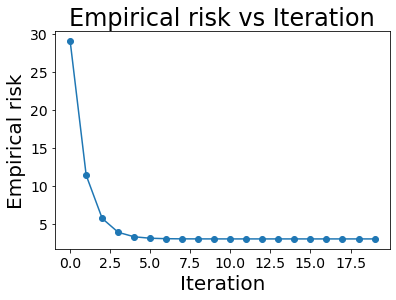

In [22]:
# Plot empirical risk at each iteration
plt.plot(risk_learn, marker="o")
plt.title('Empirical risk vs Iteration', fontsize=24)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Empirical risk', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()